# Evaluation

In [1]:
# Imports 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay
import os
import sys

sys.path.append(os.path.abspath("../scripts"))
from data_loader import DataLoader

import joblib
import pandas as pd
import numpy as np

In [2]:
# Load data
data_loader = DataLoader()
X_train, y_train  = data_loader.training_data
X_val, y_val = data_loader.validation_data
X_test, y_test = data_loader.test_data

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (177576, 21)
y_train shape: (177576,)
X_val shape: (25875, 21)
y_val shape: (25875,)
X_test shape: (50229, 21)
y_test shape: (50229,)


In [3]:
# logistic regression
lr_model_filename = (
    "../models/logistic_regression/lg_model_cv_sampling_pca20241129_165533.pkl"
)
logistic_regression = joblib.load(lr_model_filename)

# naive bayes
naive_bayes_filename = (
    "../models/naive_bayes/nb_model_cv_f1_20241129_111525.pkl"
)
naive_bayes = joblib.load(naive_bayes_filename)

# support vector machine
svm_model_filename = "../models/support_vector_machine/svm_model__with-probability_full-data__20241127_155642.pkl"
svm = joblib.load(svm_model_filename)

# decision tree
dc_filename = "../models/decision_trees_ensembles/dt_best_model_cv_sampling_pca20241129_184533.pkl"
dc = joblib.load(dc_filename)

rf_filename = "../models/decision_trees_ensembles/brf_best_model_cv_sampling_pca20241129_232921.pkl"
rf = joblib.load(rf_filename)

adab_filename = "../models/decision_trees_ensembles/adab_best_model_cv_sampling_pca20241130_184757.pkl"
adab = joblib.load(adab_filename)

# knn
knn_filename = "../models/knn/k=100_best_f1_postiv_20241128_204259.pkl"
knn = joblib.load(knn_filename)

# Nearest Centroid
nc_filename = "../models/nearest_centroid/best_20241127_201059.pkl"
nc = joblib.load(nc_filename)

# baselines
bl_model_filename = "../models/baseline/baseline_model_majority_20241129_225242.pkl"
bl_majority = joblib.load(bl_model_filename)

bl_model_strat_filename = "../models/baseline/baseline_model_stratified_20241129_225334.pkl"
bl_stratified = joblib.load(bl_model_strat_filename)

sys.path.append(os.path.abspath("../models/baseline/"))
from baselines import PCANNModel, OneFeatureModel
baseline_pca_nn = PCANNModel(n_components=1, n_neighbors=5)

bl_model_pca_nn_filename = "../models/baseline/baseline_model_pca_nn_20241129_234922.pkl"
bl_pca_nn = joblib.load(bl_model_pca_nn_filename)

# baseline_one_feature = OneFeatureModel(
#     feature=most_correlated_feature,
#     threshold=indices_largest_gap[1]
# )
# bl_model_one_feature_filename = "../models/baseline/baseline_model_one_feature_20241129_230329.pkl"
# bl_one_feature = joblib.load(bl_model_one_feature_filename)


# Neural Network
# import torch
# from neural_network.model import NeuralNet

# nn_filename = "../models/neural_net/neural_net_20241130_195408.pkl"
# # Define the input size (must match the saved model)
# input_size = 21  # Number of features

# # Instantiate the model and load state dict
# nn = NeuralNet(input_size)
# nn.load_state_dict(torch.load(nn_filename))
# nn.eval() 


# all models
model_dict = {
    "Baseline Majority": bl_majority,
    "Baseline Stratified": bl_stratified,
    "Baseline PCA": bl_pca_nn,
    # "Baseline One Feature": bl_one_feature,
    "Logistic Regression": logistic_regression,
    "Decision Tree": dc,
    "Random Forest": rf,
    "AdaBoost Decision Trees": adab,
    "Support Vector Machine": svm,
    "K-Nearest Neighbors": knn,
    "Nearest Centroid": nc,
    "Naive Bayes": naive_bayes,
    # "Neural Network": nn
    # Add other models here
}

/Users/I549663/Library/CloudStorage/OneDrive-Personal/Dokumente/Studium/MMDS/Kurse/IE500_DataMining/Project/ie500_data_mining_project/venv/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.4.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/I549663/Library/CloudStorage/OneDrive-Personal/Dokumente/Studium/MMDS/Kurse/IE500_DataMining/Project/ie500_data_mining_project/venv/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintain

In [4]:
for model_name, model in model_dict.items():
    print(f"\n=== Hyperparameters for {model_name} ===\n")
    if hasattr(model, 'get_params'):
        print(model.get_params())
    else:
        print("This model does not have hyperparameters accessible via get_params()")


=== Hyperparameters for Baseline Majority ===

{'constant': None, 'random_state': None, 'strategy': 'most_frequent'}

=== Hyperparameters for Baseline Stratified ===

{'constant': None, 'random_state': None, 'strategy': 'stratified'}

=== Hyperparameters for Baseline PCA ===

This model does not have hyperparameters accessible via get_params()

=== Hyperparameters for Logistic Regression ===

{'memory': None, 'steps': [('resampler', RandomOverSampler(random_state=42)), ('pca', None), ('classifier', LogisticRegression(C=0.1, max_iter=10000, random_state=42, solver='newton-cg',
                   tol=0.001))], 'verbose': False, 'resampler': RandomOverSampler(random_state=42), 'pca': None, 'classifier': LogisticRegression(C=0.1, max_iter=10000, random_state=42, solver='newton-cg',
                   tol=0.001), 'resampler__random_state': 42, 'resampler__sampling_strategy': 'auto', 'resampler__shrinkage': None, 'classifier__C': 0.1, 'classifier__class_weight': None, 'classifier__dual': Fa

## Metrics

In [5]:
# Evaluate the model's performance on the test set
for model_name, model in model_dict.items():
    y_test = y_test
    X_test = X_test
    y_test_pred = model.predict(X_test)

    report = classification_report(y_test, y_test_pred, digits=4, zero_division=0)
    print(f"\n=== Model: {model_name} ===\n")
    print("Classification Report:\n", report)
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Accuracy: {accuracy:.4f}")
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    specificity = tn / (tn + fp) # this is basically just the recall of the negative class
    print(f"Specificity: {specificity:.4f}") 
    cm = confusion_matrix(y_test, y_test_pred)
    print("\nConfusion Matrix:\n", cm)


=== Model: Baseline Majority ===

Classification Report:
               precision    recall  f1-score   support

         0.0     0.8424    1.0000    0.9145     42314
         1.0     0.0000    0.0000    0.0000      7915

    accuracy                         0.8424     50229
   macro avg     0.4212    0.5000    0.4572     50229
weighted avg     0.7097    0.8424    0.7704     50229

Accuracy: 0.8424
Specificity: 1.0000

Confusion Matrix:
 [[42314     0]
 [ 7915     0]]

=== Model: Baseline Stratified ===

Classification Report:
               precision    recall  f1-score   support

         0.0     0.8430    0.8409    0.8419     42314
         1.0     0.1607    0.1629    0.1618      7915

    accuracy                         0.7340     50229
   macro avg     0.5018    0.5019    0.5019     50229
weighted avg     0.7355    0.7340    0.7348     50229

Accuracy: 0.7340
Specificity: 0.8409

Confusion Matrix:
 [[35581  6733]
 [ 6626  1289]]

=== Model: Baseline PCA ===

Classification Repor

In [6]:
metrics_df = pd.DataFrame(columns=[
    'Model', 
    'Accuracy', 
    'Overall_Precision', 
    'Overall_Recall', 
    'Overall_F1',
    'Precision_Negative',
    'Precision_Positive',
    'Specificity',
    'Recall_Negative', 
    'Recall_Positive', 
    'F1-Score_Negative', 
    'F1-Score_Positive', 
])

metrics_list = []  # Temporary list to store rows before creating the final DataFrame

for model_name, model in model_dict.items():
    y_test_pred = model.predict(X_test)
    report = classification_report(y_test, y_test_pred, digits=4, output_dict=True, zero_division=0)
    accuracy = accuracy_score(y_test, y_test_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    specificity = tn / (tn + fp)  # Specificity calculation
    
    # Metrics for the negative class ('0.0')
    precision_negative = report['0.0']['precision']
    recall_negative = report['0.0']['recall']
    f1_score_negative = report['0.0']['f1-score']
    
    # Metrics for the positive class ('1.0')
    precision_positive = report['1.0']['precision']
    recall_positive = report['1.0']['recall']
    f1_score_positive = report['1.0']['f1-score']
    
    # Overall metrics (from 'weighted avg')
    overall_precision = report['weighted avg']['precision']
    overall_recall = report['weighted avg']['recall']
    overall_f1 = report['weighted avg']['f1-score']
    
    # Append metrics as a dictionary to the list
    metrics_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Overall_Precision': overall_precision,
        'Overall_Recall': overall_recall,
        'Overall_F1': overall_f1,
        'Precision_Negative': precision_negative,
        'Precision_Positive': precision_positive,
        'Specificity': specificity,
        'Recall_Negative': recall_negative,
        'Recall_Positive': recall_positive,
        'F1-Score_Negative': f1_score_negative,
        'F1-Score_Positive': f1_score_positive,

    })

# Convert the list of metrics into a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Round all numeric values to 4 decimal places
metrics_df = metrics_df.round(4)

metrics_df

,Model,Accuracy,Overall_Precision,Overall_Recall,Overall_F1,Precision_Negative,Precision_Positive,Specificity,Recall_Negative,Recall_Positive,F1-Score_Negative,F1-Score_Positive
0,Baseline Majority,0.8424,0.7097,0.8424,0.7704,0.8424,0.0000,1.0000,1.0000,0.0000,0.9145,0.0000
1,Baseline Stratified,0.7330,0.7339,0.7330,0.7335,0.8420,0.1556,0.8408,0.8408,0.1568,0.8414,0.1562
2,Baseline PCA,0.8154,0.7533,0.8154,0.7754,0.8476,0.2489,0.9521,0.9521,0.0849,0.8968,0.1266
3,Logistic Regression,0.7280,0.8480,0.7280,0.7624,0.9431,0.3395,0.7205,0.7205,0.7678,0.8170,0.4708
4,Decision Tree,0.6988,0.8439,0.6988,0.7386,0.9428,0.3153,0.6840,0.6840,0.7781,0.7928,0.4488
5,Random Forest,0.7535,0.8434,0.7535,0.7818,0.9341,0.3583,0.7611,0.7611,0.7131,0.8388,0.4770
6,AdaBoost Decision Trees,0.7467,0.8417,0.7467,0.7763,0.9335,0.3507,0.7530,0.7530,0.7132,0.8336,0.4702
7,Support Vector Machine,0.5356,0.8412,0.5356,0.5905,0.9542,0.2372,0.4714,0.4714,0.8790,0.6310,0.3736
8,K-Nearest Neighbors,0.7433,0.8380,0.7433,0.7732,0.9303,0.3448,0.7516,0.7516,0.6988,0.8314,0.4617
9,Nearest Centroid,0.6902,0.8374,0.6902,0.7312,0.9370,0.3051,0.6779,0.6779,0.7562,0.7866,0.4348


## Confusion Matrix Plot

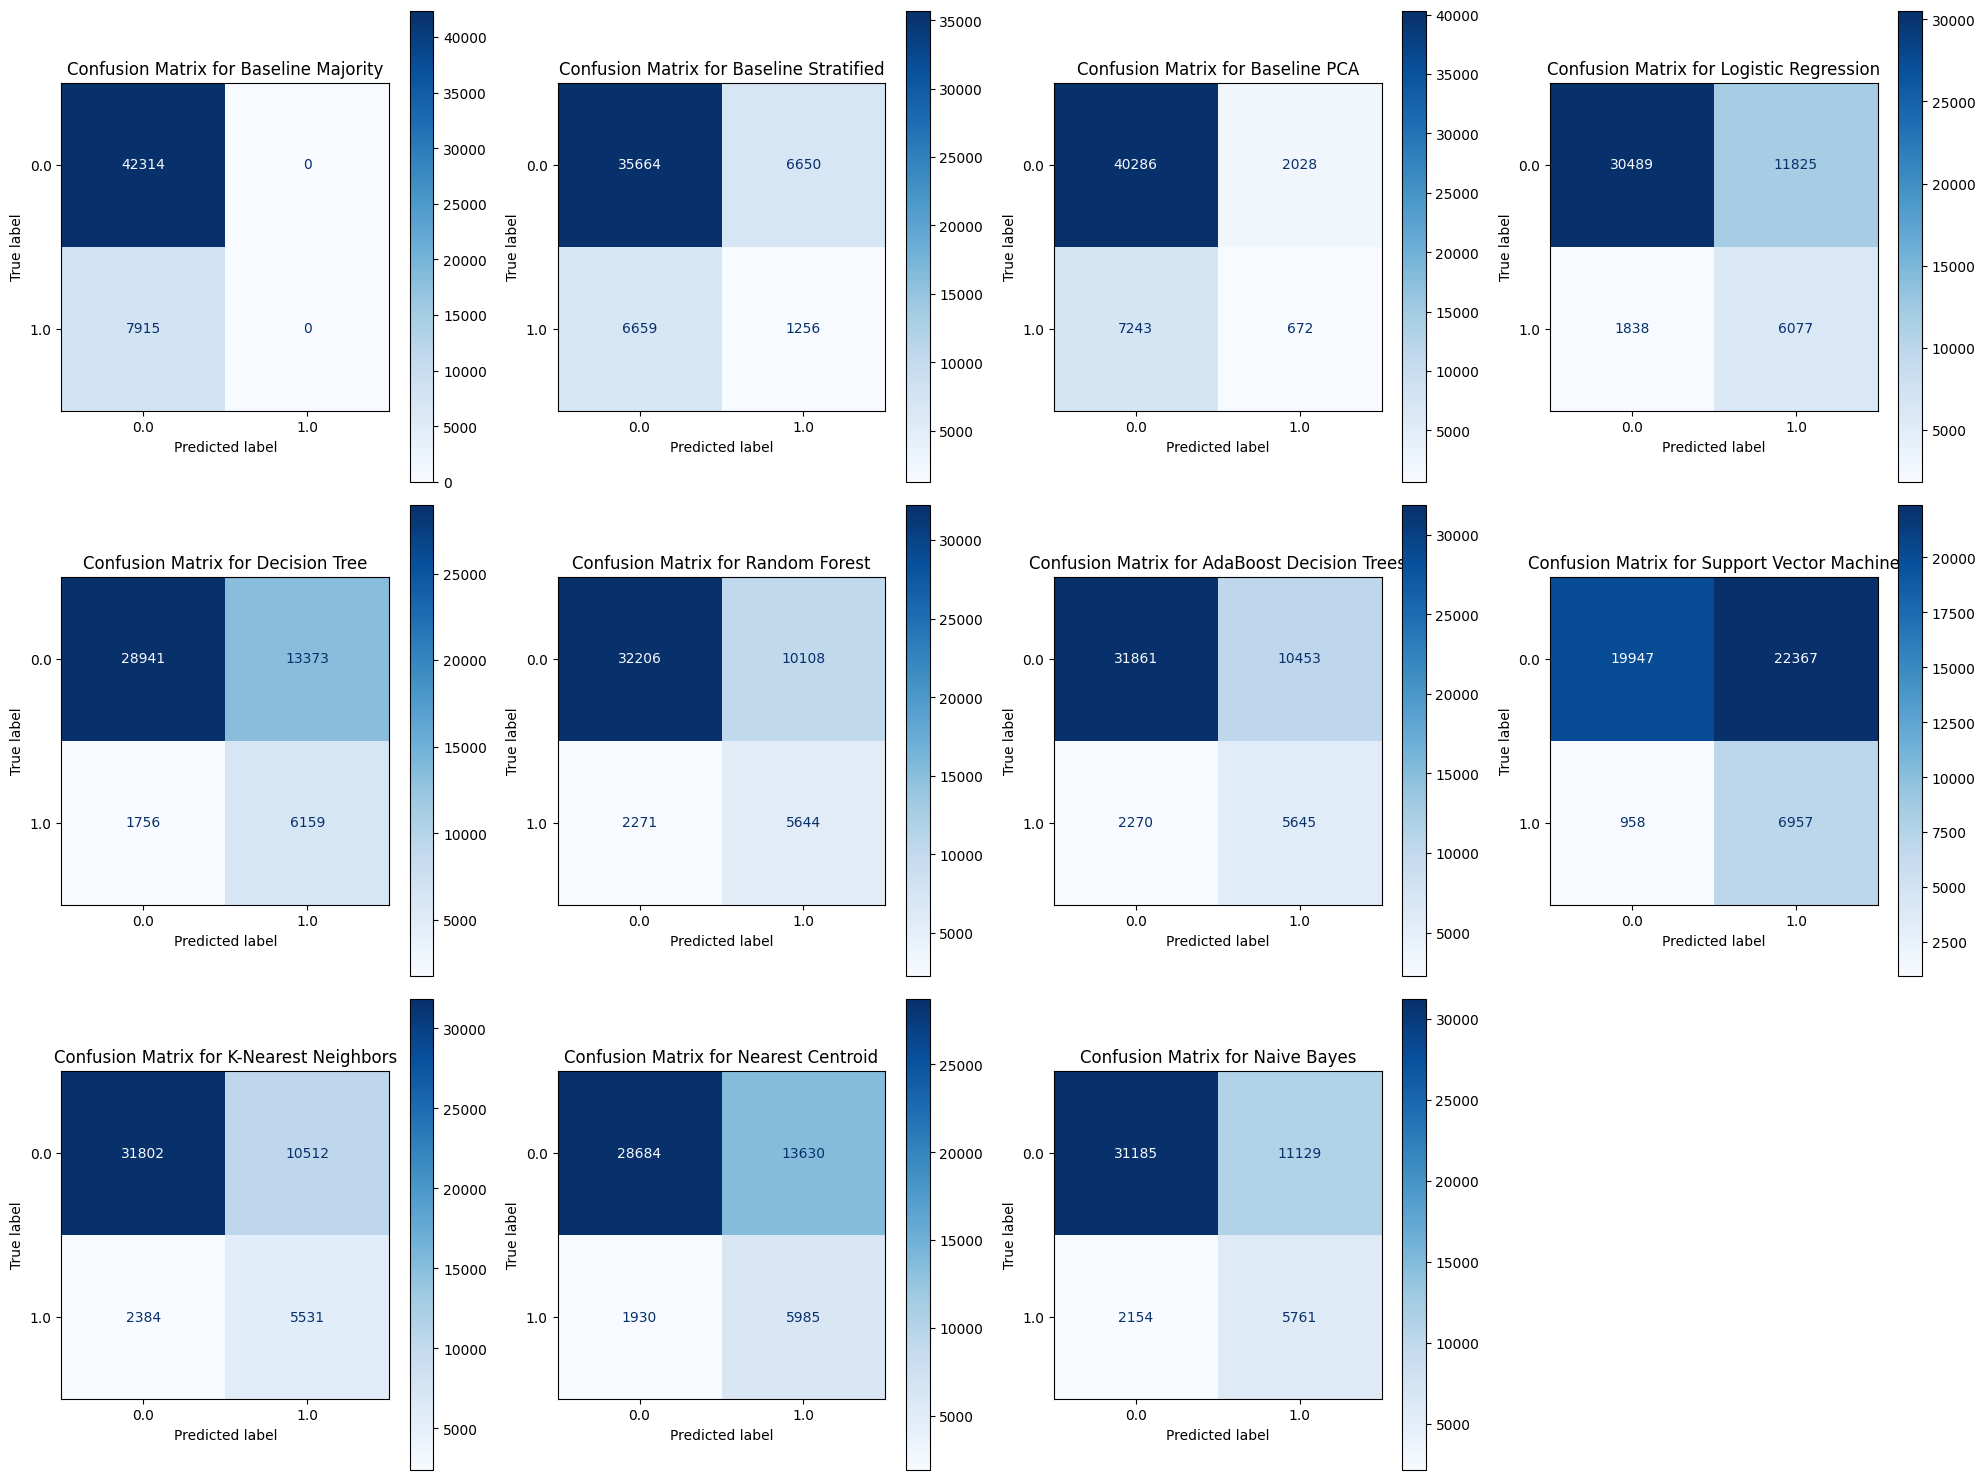

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Number of models to plot
n_models = len(model_dict)

# Determine grid size (e.g., 2x2 for 4 models, 3x2 for 6 models, etc.)
rows = int(n_models**0.5)
cols = (n_models + rows - 1) // rows  # Ceiling division

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))

# Flatten the axes array for easy indexing, in case it’s a multi-dimensional array
axes = axes.flatten()

for idx, (model_name, model) in enumerate(model_dict.items()):
    y_test_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Plot confusion matrix on the corresponding subplot
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(ax=axes[idx], cmap=plt.cm.Blues, values_format='d')
    axes[idx].set_title(f'Confusion Matrix for {model_name}')
    
# Hide any unused subplots
for ax in axes[len(model_dict):]:
    ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


## Precision Recall Curve

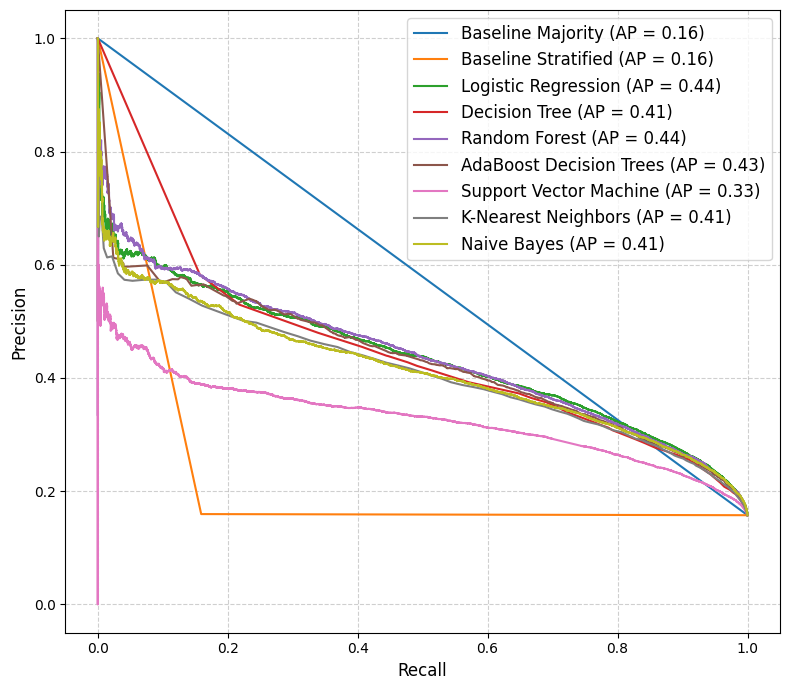

In [8]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Initialize a figure
plt.figure(figsize=(8, 7))

# Iterate over models and plot their Precision-Recall curves on the same plot
for model_name, model in model_dict.items():
    # Use predict_proba to get probabilities for the positive class
    if hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(X_test)[:, 1]  # Use probabilities for the positive class
    else:
        # Fallback to decision_function if predict_proba is unavailable
        try:
            y_test_proba = model.decision_function(X_test)
        except:
            continue
    
    # Compute precision, recall, and average precision
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    avg_precision = average_precision_score(y_test, y_test_proba)
    
    # Plot the Precision-Recall curve with AP in the label
    plt.plot(recall, precision, label=f"{model_name} (AP = {avg_precision:.2f})")

# Add plot customizations
# plt.title("2-Class Precision-Recall Curve", fontsize=14)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.grid(alpha=0.6, linestyle='--')
plt.legend(fontsize=12)
plt.tight_layout()

# Display the combined plot
plt.show()

## ROC Curve

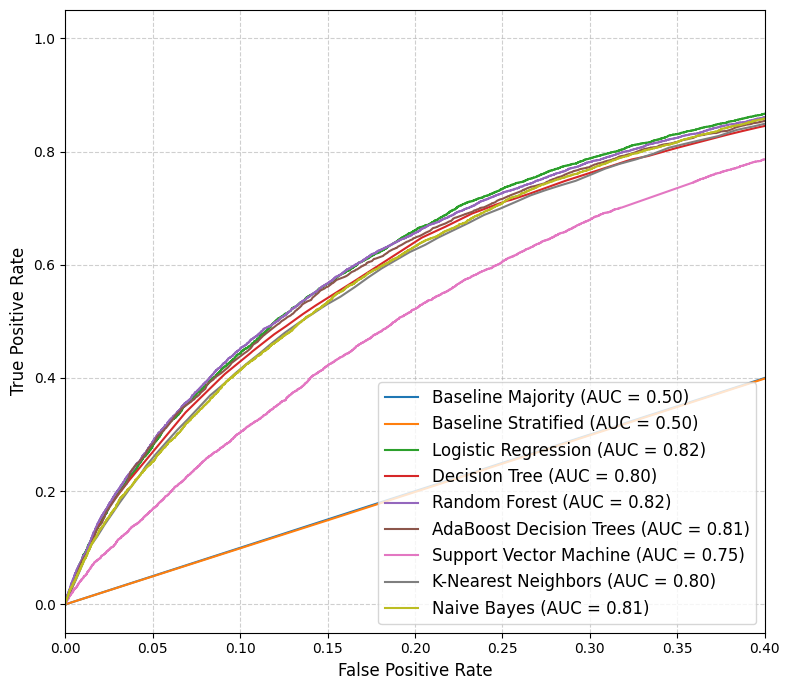

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize a figure
plt.figure(figsize=(8, 7))

# Iterate over models and plot their ROC curves on the same plot
for model_name, model in model_dict.items():
    if hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(X_test)[:, 1]  # Use probabilities for the positive class
    else:
        # Fallback to decision_function if predict_proba is unavailable
        try:
            y_test_proba = model.decision_function(X_test)
        except:
            continue
    
    # Compute false positive rate, true positive rate, and AUC
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    
    # Plot the ROC curve with AUC in the label
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Add plot customizations
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.grid(alpha=0.6, linestyle='--')
plt.legend(fontsize=12)
plt.xlim(0, 0.4)  # Limit x-axis to 0.4
plt.tight_layout()

# Display the combined plot
plt.show()

## Conclusion

In [14]:
metrics_df.T

,0,1,2,3,4,5,6,7,8,9,10
Model,Baseline Majority,Baseline Stratified,Baseline PCA,Logistic Regression,Decision Tree,Random Forest,AdaBoost Decision Trees,Support Vector Machine,K-Nearest Neighbors,Nearest Centroid,Naive Bayes
Accuracy,0.8424,0.733,0.8154,0.728,0.6988,0.7535,0.7467,0.5356,0.7433,0.6902,0.7356
Overall_Precision,0.7097,0.7339,0.7533,0.848,0.8439,0.8434,0.8417,0.8412,0.838,0.8374,0.8417
Overall_Recall,0.8424,0.733,0.8154,0.728,0.6988,0.7535,0.7467,0.5356,0.7433,0.6902,0.7356
Overall_F1,0.7704,0.7335,0.7754,0.7624,0.7386,0.7818,0.7763,0.5905,0.7732,0.7312,0.7677
Precision_Negative,0.8424,0.842,0.8476,0.9431,0.9428,0.9341,0.9335,0.9542,0.9303,0.937,0.9354
Precision_Positive,0.0,0.1556,0.2489,0.3395,0.3153,0.3583,0.3507,0.2372,0.3448,0.3051,0.3411
Specificity,1.0,0.8408,0.9521,0.7205,0.684,0.7611,0.753,0.4714,0.7516,0.6779,0.737
Recall_Negative,1.0,0.8408,0.9521,0.7205,0.684,0.7611,0.753,0.4714,0.7516,0.6779,0.737
Recall_Positive,0.0,0.1568,0.0849,0.7678,0.7781,0.7131,0.7132,0.879,0.6988,0.7562,0.7279


In [16]:
metrics_df_filtered = metrics_df[[
    'Model', 
    'Accuracy', 
    'Precision_Negative', 
    'Precision_Positive', 
    'Recall_Negative', 
    'Recall_Positive', 
    'F1-Score_Negative', 
    'F1-Score_Positive'
]]

metrics_df_filtered.T

,0,1,2,3,4,5,6,7,8,9,10
Model,Baseline Majority,Baseline Stratified,Baseline PCA,Logistic Regression,Decision Tree,Random Forest,AdaBoost Decision Trees,Support Vector Machine,K-Nearest Neighbors,Nearest Centroid,Naive Bayes
Accuracy,0.8424,0.733,0.8154,0.728,0.6988,0.7535,0.7467,0.5356,0.7433,0.6902,0.7356
Precision_Negative,0.8424,0.842,0.8476,0.9431,0.9428,0.9341,0.9335,0.9542,0.9303,0.937,0.9354
Precision_Positive,0.0,0.1556,0.2489,0.3395,0.3153,0.3583,0.3507,0.2372,0.3448,0.3051,0.3411
Recall_Negative,1.0,0.8408,0.9521,0.7205,0.684,0.7611,0.753,0.4714,0.7516,0.6779,0.737
Recall_Positive,0.0,0.1568,0.0849,0.7678,0.7781,0.7131,0.7132,0.879,0.6988,0.7562,0.7279
F1-Score_Negative,0.9145,0.8414,0.8968,0.817,0.7928,0.8388,0.8336,0.631,0.8314,0.7866,0.8244
F1-Score_Positive,0.0,0.1562,0.1266,0.4708,0.4488,0.477,0.4702,0.3736,0.4617,0.4348,0.4645


In [ ]:
# Neural Net
# Evlauaiton on test data in deep neural network notebook:

#               precision    recall  f1-score   support

#          0.0     0.9191    0.8068    0.8593     42314
#          1.0     0.3753    0.6205    0.4677      7915

#     accuracy                         0.7775     50229
#    macro avg     0.6472    0.7137    0.6635     50229
# weighted avg     0.8334    0.7775    0.7976     50229

In [ ]:
# Baseline One Feature 
# Evaluation on test data in baseline notebook:

#                precision    recall  f1-score   support

#          0.0       0.88      0.87      0.88     42314
#          1.0       0.36      0.39      0.37      7915

#     accuracy                           0.79     50229
#    macro avg       0.62      0.63      0.63     50229
# weighted avg       0.80      0.79      0.80     50229